<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2015-1</h1>

<h2>Andrés Camacho López </h2> 

---
## Profesor:
## Sergio A. Alcalá Corona
## Ayudantes:
### Rodrigo Vega Vilchis
### Joel Gómez Uribe
---

<h1 align="center">Programación para la física computacional</h1> 

## Práctica 5.  Programación para la física computacional


###

---

### EJERCICIOS:


**1. Diferenciacion numerica**


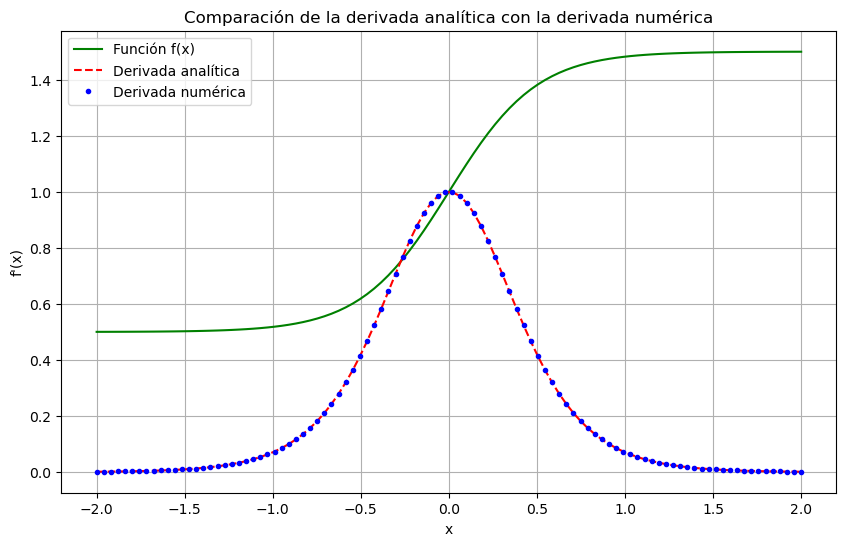

In [30]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

h = 1e-2 #definimos una h cercana a 0
def f(x): #función a derivar
    return(1 + ((1/2)*mt.tanh(2*x)))
def analitica(x): #derivada analítica como función previamente calculada
    return(1/(mt.cosh(2*x))**2)
def derivada(f,x,h): #derivada numérica central
    return((f(x+h)-f(x-h))/(2*h))

rangx = np.linspace(-2,2,100) #rango en que se deriva con varias divisiones para la gráfica
fpuntos = [f(x) for x in rangx] #definimos los puntos de nuestra función a evaluar
puntosdeva = [analitica(x) for x in rangx] #Puntos a evaluar en la funcion analítica
puntosdevn = [derivada(f,x,h) for x in rangx] #puntos a evaluar en la derivada númerica
#print("La derivada anlítica en algunos puntos es:", puntosdeva) 
#print("La derivada numerica en algunos puntos es:", puntosdevn)

plt.figure(figsize=(10,6)) #código para la gráfica
plt.plot(rangx, fpuntos, "g", label = "Función f(x)")
plt.plot(rangx, puntosdeva, "r--", label = "Derivada analítica")
plt.plot(rangx, puntosdevn, "b.", label = "Derivada numérica")
plt.title("Comparación de la derivada analítica con la derivada numérica")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid()
plt.show()

**Ejercicio 2**

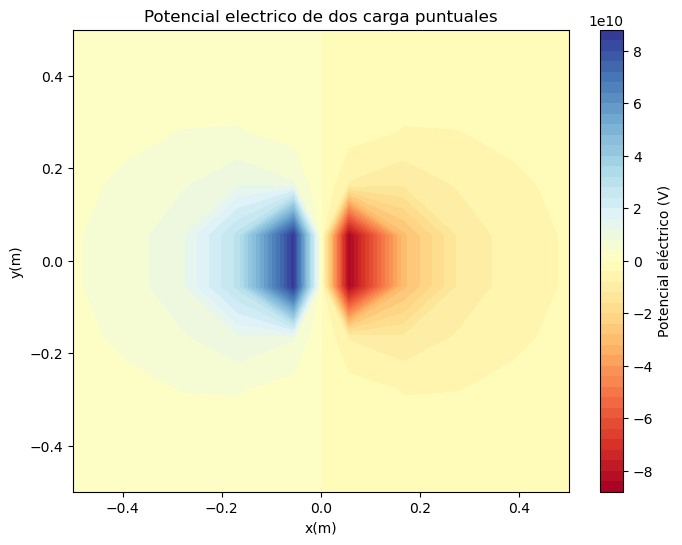

In [164]:
import numpy as np
import matplotlib.pyplot as plt
#defeinir las constantes
e0 = 8.854e-12
q1 = 1
q2 = -1
d = 0.1 # en metros 

#Hacer la cuadricula pedida
x = np.linspace(-0.5, 0.5, 10)#intervalor con partciciones
y = np.linspace(-0.5, 0.5, 10) #con un numero de intervalos mayor, la visualización no es muy buena no sé porque
X, Y = np.meshgrid(x, y) #crear la malla

#posciones de las cargas
pq1 = np.array([-d/2,0])
pq2 = np.array([d/2,0])

def potencial(q, p, X, Y): #definimos el potencia con la fórmula dada (p significa la posicion en x o y)
    R = np.sqrt((X - p[0])**2 + (Y - p[1])**2)
    if np.any(R==0): #evitar divisones entre cero
        R[R==0]= 1e-12
    return(q/(4*np.pi*e0*R))
#definimos los potenciales en cada punto
phi1 = potencial(q1, pq1, X, Y)
phi2 = potencial(q2, pq2, X, Y)
phitotal = phi1 + phi2

plt.figure(figsize=(8,6))
plt.contourf(X, Y,phitotal,levels=50, cmap="RdYlBu")
plt.title("Potencial electrico de dos carga puntuales")
plt.colorbar(label="Potencial eléctrico (V)")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show()

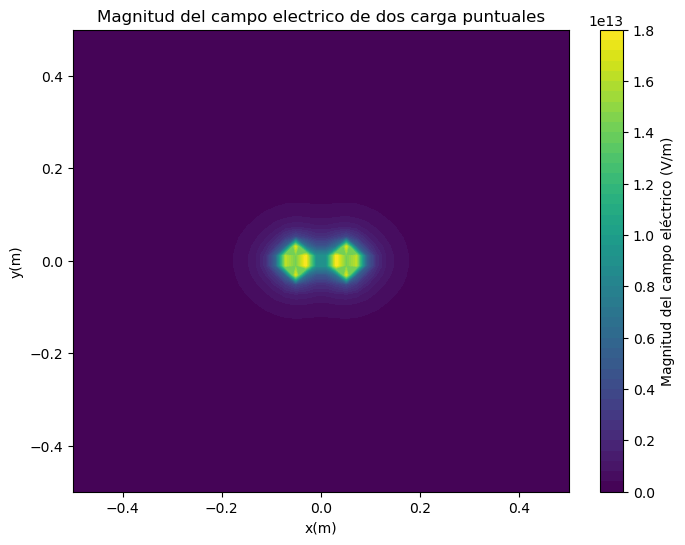

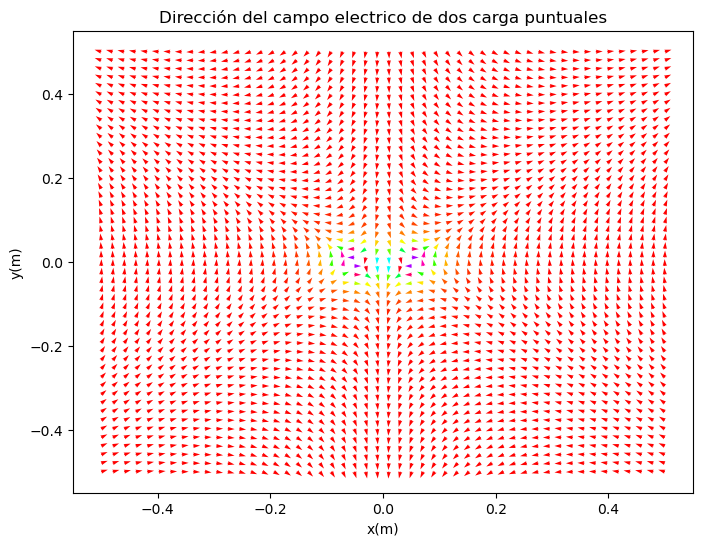

In [224]:
import numpy as np
import matplotlib.pyplot as plt
#defeinir las constantes
e0 = 8.854e-12
q1 = 1
q2 = -1
d = 0.1 # en metros 

#Hacer la cuadricula pedida
x = np.linspace(-0.5, 0.5, 50)#intervalor con partciciones
y = np.linspace(-0.5, 0.5, 50) #con un numero de intervalos mayor, la visualización no es muy buena no sé porque
X, Y = np.meshgrid(x, y) #crear la malla

#posciones de las cargas
pq1 = np.array([-d/2,0])
pq2 = np.array([d/2,0])

def potencial(q, p, X, Y): #definimos el potencia con la fórmula dada (p significa la posicion en x o y)
    R = np.sqrt((X - p[0])**2 + (Y - p[1])**2)
    if np.any(R==0): #evitar divisones entre cero
        R[R==0]= 1e-12
    return(q/(4*np.pi*e0*R))
#definimos los potenciales en cada punto
phi1 = potencial(q1, pq1, X, Y)
phi2 = potencial(q2, pq2, X, Y)
phitotal = phi1 + phi2

dvx = np.zeros_like(phitotal) # matrices para almacenar las derivadas
dvy = np.zeros_like(phitotal)

h = x[0]-x[1]#definimos una h (el espacio en la cuadrícula)

for i in range(phitotal.shape[0]): #definimos rango para x
    for j in range(phitotal.shape[1]): #definimos el rago para y
        if 1 <= i < phitotal.shape[0]-1: #derivada central x para los puntos intermedios
            dvx[i,j]=(phitotal[i+1,j]- phitotal[i-1,j])/(2*h)
        elif i == 0: #derivada para los extremos
            dvx[i,j] = (phitotal[i+1,j]- phitotal[i,j])/h #derecha para los extremos izquierdos en x
        else:
            dvx[i,j]= (phitotal[i,j]- phitotal[i-1,j])/h #izquierda para los extremso derechos en x
            
        if 1 <= j < phitotal.shape[1]-1: #derivada central y para los puntos intermedios
            dvy[i,j]=(phitotal[i,j+1] - phitotal[i,j-1])/(2*h)
        elif j == 0:
            dvy[i,j] = (phitotal[i,j+1]- phitotal[i,j])/h #derecha para los extremos izquierdos en y
        else:
            dvy[i,j]= (phitotal[i,j]- phitotal[i,j-1])/h #izquierda para los extremso derechos en y
#definir los campos en x y y
Ex = -dvx
Ey = -dvy
Et = np.sqrt(Ex**2 + Ey**2)
Exn = Ex/Et #campos normalizados para evitar que salgas flechas muy grandes en el mapa de direcciónes
Eyn = Ey/Et #Si graficamos Ex y Ey sin normalizar tendremos algunas flechas con una magnitud muy grande

plt.figure(figsize=(8,6))
plt.contourf(X, Y, Et,levels=50, cmap="viridis")
plt.title("Magnitud del campo electrico de dos carga puntuales")
plt.colorbar(label="Magnitud del campo eléctrico (V/m)")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show()

plt.figure(figsize=(8,6))
plt.quiver(X, Y, Exn, Eyn, Et, cmap="hsv")
plt.title("Dirección del campo electrico de dos carga puntuales")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show()

/tmp/ipykernel_3896/1879350046.py:47: RuntimeWarning: invalid value encountered in divide
  Exn = Ex/Et
/tmp/ipykernel_3896/1879350046.py:48: RuntimeWarning: invalid value encountered in divide
  Eyn = Ey/Et


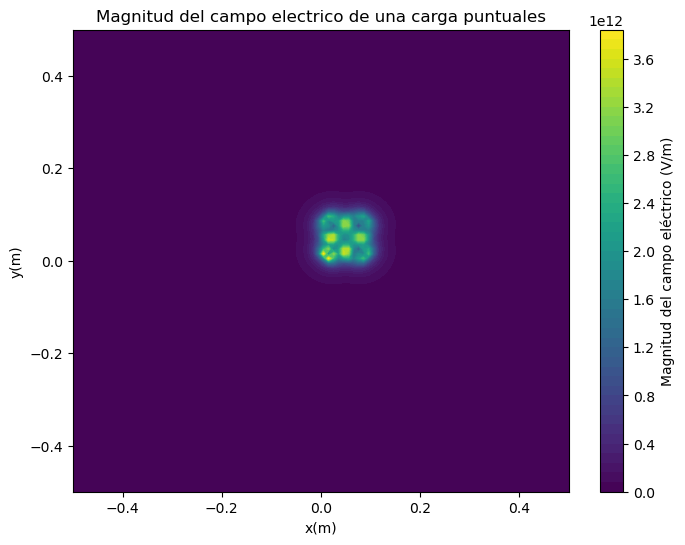

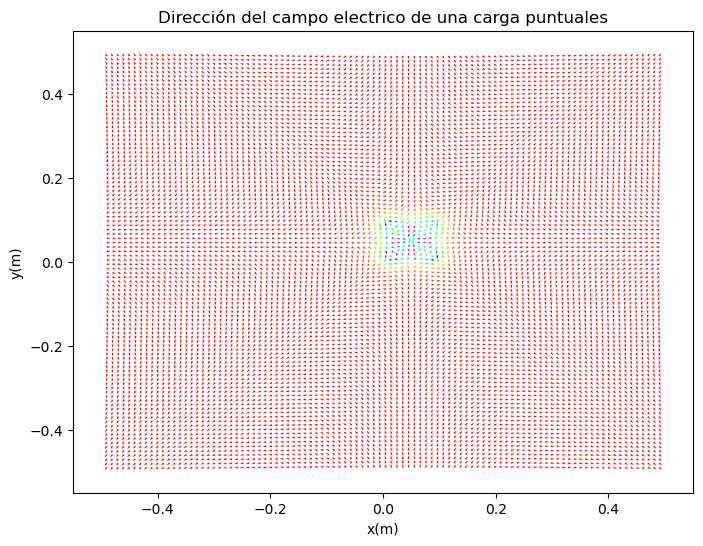

In [258]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

e0 = 8.85e-12
q0 = 100 #C/m^2
L = 0.1 # m

def sigma(x, y):
    return(q0*np.sin(2*np.pi*x/L)*np.sin(2*np.pi*y/L))

n = 10 
p , ws = roots_legendre(n)
p = L/2 *(p+1) #posicion en el intervalo de integración
ws = L/2 * ws #pesos para la cuadratura gaussiana

#integrando por cuadratura gaussiana
def potencial(x, y):
    v = 0 
    for i in range(n):
        for j in range(n):
            xp = p[i] #x'
            yp = p[j] #y'
            w = ws[i]*ws[j]
            r = np.sqrt((x-xp)**2 +(y-yp)**2)
            if r != 0:
                 v = v + sigma(xp,yp)*w/r
    return( v/(4*np.pi*e0))

a = 1 #metro cuadrado
h = 0.01 #centrimeto de espaciamiento
x = np.linspace(-a/2 , a/2, 100) #puntos con el espaciamiento y lognitud pedidos
y = np.linspace(-a/2 , a/2, 100)
X, Y = np.meshgrid(x, y)
v = np.vectorize(potencial)(X, Y)

def gradiente(v, h):
    Ex = np.zeros_like(v)
    Ey = np.zeros_like(v)
    for i in range(1, v.shape[0]-1):
        for j in range(1, v.shape[1]-1):
            Ex[i,j] = -(v[i+1,j]-v[i-1,j])/(2*h) #gradiente con el signo negativo necesario
            Ey[i,j] = -(v[i, j+1]-v[i,j-1])/(2*h)
    return(Ex, Ey)
Ex, Ey = gradiente(v , h) 
Et = np.sqrt( Ex**2 + Ey**2)
Exn = Ex/Et
Eyn = Ey/Et

plt.figure(figsize=(8,6))
plt.contourf(X, Y, Et,levels=50, cmap="viridis")
plt.title("Magnitud del campo electrico de una carga puntuales")
plt.colorbar(label="Magnitud del campo eléctrico (V/m)")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show()

plt.figure(figsize=(8,6))
plt.quiver(X, Y, Exn, Eyn, Et, cmap="hsv")
plt.title("Dirección del campo electrico de una carga puntuales")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show() #no se porque me sale descentrado

**Ejercicio 3**

Inciso a)

In [45]:
import numpy as np
data = np.loadtxt("altitudes.txt") #abrir el documento de texto

h = 30000 #definir la h como pide el ejercicio

dx = np.zeros_like(data) #creamos un arreglo de ceros(matriz) para guardar los datos de derivadas en x
dy = np.zeros_like(data) #creamos un arreglo de ceros(matriz) para guardar los datos de derivadas en y

for i in range(data.shape[0]): #definimos el rango para x
    for j in range(data.shape[1]): #definimos el rago para y
        if 1 <= i < data.shape[0]-1: #derivada central x para los puntos intermedios
            dx[i,j]=(data[i+1,j]- data[i-1,j])/(2*h)
        elif i == 0: #derivada para los extremos
            dx[i,j] = (data[i+1,j]-data[i,j])/h #derecha para los extremos izquierdos en x
        else:
            dx[i,j]= (data[i,j]-data[i-1,j])/h #izquierda para los extremso derechos en x
            
        if 1 <= j < data.shape[1]-1: #derivada central y para los puntos intermedios
            dy[i,j]=(data[i,j+1]- data[i,j-1])/(2*h)
        elif j == 0:
            dy[i,j] = (data[i,j+1]-data[i,j])/h #derecha para los extremos izquierdos en y
        else:
            dy[i,j]= (data[i,j]-data[i,j]-1)/h #izquierda para los extremso derechos en y

print("Las derivadas parciales respecto a x son:", dx)
print("Las derivadas parciales respecto a y son:", dy)

Las derivadas parciales respecto a x son: [[ 0.004891    0.005186    0.00547167 ...  0.00385367  0.00422067
   0.00458067]
 [ 0.02438683  0.02444717  0.02441683 ...  0.02337717  0.0238115
   0.02418133]
 [ 0.03476033  0.03422017  0.033555   ...  0.03458617  0.03478583
   0.03493867]
 ...
 [-0.00280683 -0.00280083 -0.00279533 ... -0.00281483 -0.00281233
  -0.00281033]
 [-0.00326417 -0.003239   -0.00321217 ... -0.00334017 -0.00331617
  -0.00328967]
 [-0.003727   -0.003699   -0.003672   ... -0.00382    -0.00378833
  -0.00375833]]
Las derivadas parciales respecto a y son: [[ 4.26666667e-05  3.65000000e-05  2.91666667e-05 ...  9.03333333e-05
   8.10000000e-05 -3.33333333e-05]
 [ 3.37666667e-04  3.26833333e-04  3.04333333e-04 ...  4.61000000e-04
   4.44500000e-04 -3.33333333e-05]
 [ 1.63333333e-04  6.65000000e-05 -7.51666667e-05 ...  9.66500000e-04
   8.85166667e-04 -3.33333333e-05]
 ...
 [-5.33333333e-05 -5.48333333e-05 -5.55000000e-05 ... -5.00000000e-05
  -5.35000000e-05 -3.33333333e-05]


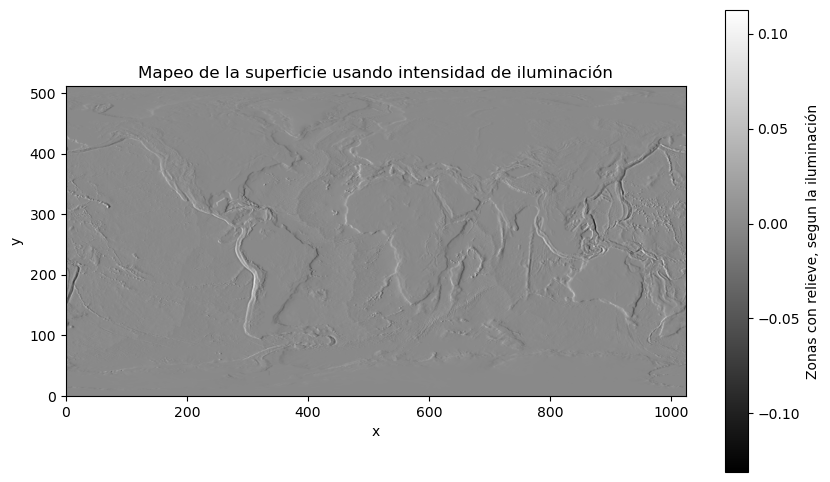

In [166]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("altitudes.txt") #abrir el documento de texto

h = 30000 #definir la h como pide el ejercicio

dx = np.zeros_like(data) #creamos un arreglo de ceros(matriz) para guardar los datos de derivadas en x
dy = np.zeros_like(data) #creamos un arreglo de ceros(matriz) para guardar los datos de derivadas en y

for i in range(data.shape[0]): #definimos el rango para x
    for j in range(data.shape[1]): #definimos el rago para y
        if 1 <= i < data.shape[0]-1: #derivada central x para los puntos intermedios
            dx[i,j]=(data[i+1,j]- data[i-1,j])/(2*h)
        elif i == 0: #derivada para los extremos
            dx[i,j] = (data[i+1,j]-data[i,j])/h #derecha para los extremos izquierdos en x
        else:
            dx[i,j]= (data[i,j]-data[i-1,j])/h #izquierda para los extremso derechos en x
            
        if 1 <= j < data.shape[1]-1: #derivada central y para los puntos intermedios
            dy[i,j]=(data[i,j+1]- data[i,j-1])/(2*h)
        elif j == 0:
            dy[i,j] = (data[i,j+1]-data[i,j])/h #derecha para los extremos izquierdos en y
        else:
            dy[i,j]= (data[i,j]-data[i,j-1])/h #izquierda para los extremso derechos en y

phi = np.pi/2 #angulo a 45°
I = ((np.cos(phi)*dx)+(np.sin(phi)*dy))/(np.sqrt(dx**2 + dy**2 +1)) #definimos intensidad como indica la teoria del ejercicio

plt.figure(figsize=(10,6))
plt.imshow(I, cmap="gray", extent=[0,data.shape[1], 0, data.shape[0]]) #Mapeo del relieve usando la intensidad I
#se ve mejor con ocean, hot, o gist_earth
plt.colorbar(label="Zonas con relieve, segun la iluminación")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mapeo de la superficie usando intensidad de iluminación")
plt.show()

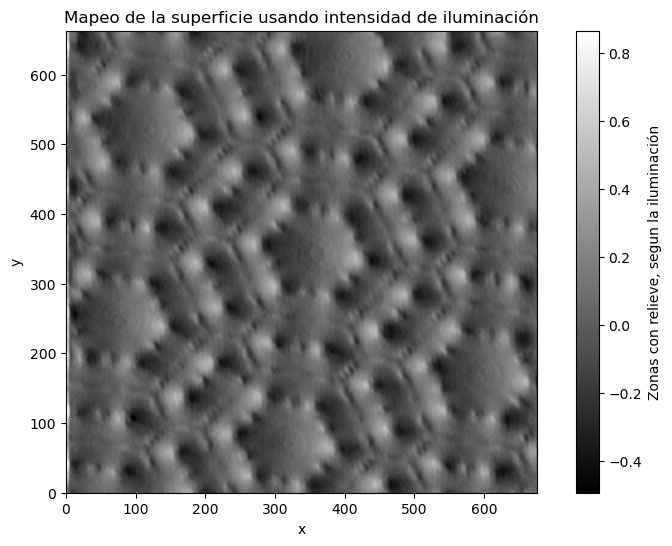

In [165]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("stm.txt") #abrir el documento de texto

h = 2.5 #definir la h como pide el ejercicio

dx = np.zeros_like(data) #creamos un arreglo de ceros(matriz) para guardar los datos de derivadas en x
dy = np.zeros_like(data) #creamos un arreglo de ceros(matriz) para guardar los datos de derivadas en y

for i in range(data.shape[0]): #definimos el rango para x
    for j in range(data.shape[1]): #definimos el rago para y
        if 1 <= i < data.shape[0]-1: #derivada central x para los puntos intermedios
            dx[i,j]=(data[i+1,j]- data[i-1,j])/(2*h)
        elif i == 0: #derivada para los extremos
            dx[i,j] = (data[i+1,j]-data[i,j])/h #derecha para los extremos izquierdos en x
        else:
            dx[i,j]= (data[i,j]-data[i-1,j])/h #izquierda para los extremso derechos en x
            
        if 1 <= j < data.shape[1]-1: #derivada central y para los puntos intermedios
            dy[i,j]=(data[i,j+1]- data[i,j-1])/(2*h)
        elif j == 0:
            dy[i,j] = (data[i,j+1]-data[i,j])/h #derecha para los extremos izquierdos en y
        else:
            dy[i,j]= (data[i,j]-data[i,j-1])/h #izquierda para los extremso derechos en y

phi = np.pi/2 #angulo a 45°
I = ((np.cos(phi)*dx)+(np.sin(phi)*dy))/(np.sqrt(dx**2 + dy**2 +1)) #definimos intensidad como indica la teoria del ejercicio

plt.figure(figsize=(10,6))
plt.imshow(I, cmap="gray", extent=[0,data.shape[1], 0, data.shape[0]]) #Mapeo del relieve usando la intensidad I
#se ve mejor con hot, inferno, magma, cubehelix, se ve bien loco con flag XD
plt.colorbar(label="Zonas con relieve, segun la iluminación")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mapeo de la superficie usando intensidad de iluminación")
plt.show()